In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 1. Preparing the data for analysis

In [2]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('data\police.csv')

In [3]:
# Examine the head of the DataFrame
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [4]:
# Count the number of missing values in each column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [5]:
# Examine the shape of the DataFrame
ri.shape

(91741, 15)

In [6]:
# Drop the 'county_name' column
ri.drop('county_name', axis=1, inplace=True)

In [7]:
# Examine the shape of the DataFrame (again)
ri.shape

(91741, 14)

In [8]:
# Count the number of missing values in each column
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [9]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

In [10]:
# Count the number of missing values in each column (again)
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

In [11]:
# Examine the shape of the DataFrame
ri.shape

(86536, 14)

In [12]:
# Check dtypes
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [13]:
# Examine the head of the 'is_arrested' column
ri.is_arrested.head()

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object

In [14]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [15]:
# Double check
ri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [16]:
# Take a look at stop_date and stop_time columns
ri.head(3)

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [17]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

In [18]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [19]:
# Examine the data types of the DataFrame
ri.dtypes

state                         object
stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [20]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

In [21]:
# Examine the index
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [22]:
# Examine the columns
ri.columns

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

# 2. Exploring the relationship between gender and policing
### Do the genders commit different violations?

In [23]:
# Count the unique values in 'violation'
ri.violation.value_counts()

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

In [24]:
# Express the counts as proportions
ri.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [25]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

In [26]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

In [27]:
# Compute the violations by female drivers (as proportions)
female.violation.value_counts(normalize=True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [28]:
# Compute the violations by male drivers (as proportions)
male.violation.value_counts(normalize=True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

**Answer:** The genders commit the same violations in different proportions. 

### Does gender affect who gets a ticket for speeding?

In [29]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

In [30]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

In [31]:
# Compute the stop outcomes for female drivers (as proportions)
female_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

In [32]:
# Compute the stop outcomes for male drivers (as proportions)
male_and_speeding.stop_outcome.value_counts(normalize=True)

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64

**Answer:** Not really, men and women each get ticketed for speeding roughly 95% of the time.

### Does gender affect whose vehicle is searched?

In [33]:
# Check the data type of 'search_conducted'
ri.search_conducted.dtype

dtype('bool')

In [34]:
# Calculate the search rate by counting the values
ri.search_conducted.value_counts()

False    83229
True      3307
Name: search_conducted, dtype: int64

In [35]:
# Calculate the search rate by taking the mean
ri.search_conducted.mean()

0.0382153092354627

In [36]:
# Calculate the search rate for female drivers
ri[ri.driver_gender == 'F'].search_conducted.mean()

0.019180617481282074

In [37]:
# Calculate the search rate for male drivers
ri[ri.driver_gender == 'M'].search_conducted.mean()

0.04542557598546892

In [38]:
# Calculate the search rate for both groups simultaneously
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

**Answer:** Men are more than twice as likely to have their vehicle searched.

#### Adding a second factor to the analysis

In [39]:
# Calculate the search rate for each combination of gender and violation
ri.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

In [40]:
# Reverse the ordering to group by violation before gender
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

**Answer:** Men are more likely to be searched for every violoation.

### Does gender affect who is frisked during a search?

In [41]:
# Count the 'search_type' values
ri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [42]:
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [43]:
# Check the data type of 'frisk'
ri.frisk.dtype

dtype('bool')

In [44]:
# Take the sum of 'frisk'
ri.frisk.sum()

303

In [45]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

In [46]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
searched.frisk.mean()

0.09162382824312065

In [47]:
# Calculate the frisk rate for each gender
searched.groupby('driver_gender').frisk.mean()

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64

**Answer:** When a search is conducted, men are frisked at a slightly higher rate.

# 3. Visual exploratory data analysis
### Does time of day affect arrest rate?

In [48]:
# Calculate the overall arrest rate
ri.is_arrested.mean()

0.0355690117407784

In [49]:
# Calculate the hourly arrest rate
ri.groupby(ri.index.hour).is_arrested.mean()

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64

In [50]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

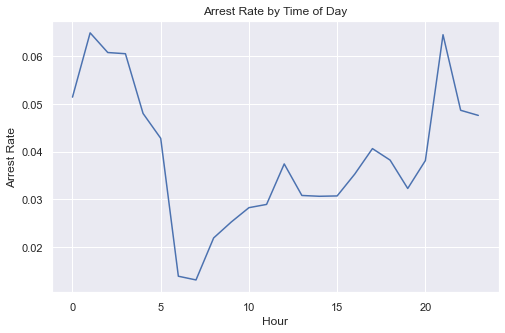

In [51]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot(figsize=(8,5))
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

**Answer:** Yes, arrest rates spike at night and drop during the day.

### Are drug-related stops on the rise?

In [52]:
# Calculate the annual rate of drug-related stops
ri.drugs_related_stop.resample('A').mean()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [53]:
# Different method, same result
ri.groupby(ri.index.year).drugs_related_stop.mean()

stop_datetime
2005    0.006501
2006    0.007258
2007    0.007970
2008    0.007505
2009    0.009889
2010    0.010081
2011    0.009731
2012    0.009921
2013    0.013094
2014    0.013826
2015    0.012266
Name: drugs_related_stop, dtype: float64

In [54]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

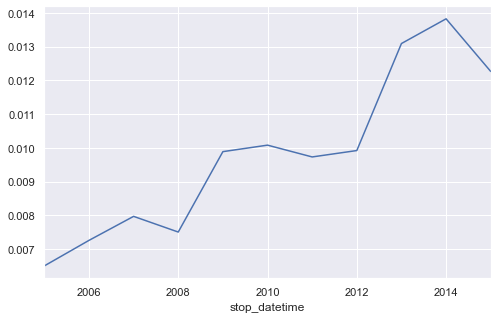

In [55]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot(figsize=(8,5))
plt.show()

In [56]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

In [57]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

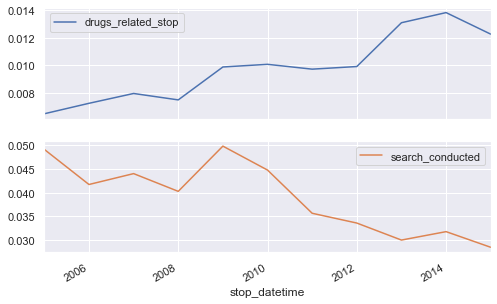

In [58]:
# Create subplots from 'annual'
annual.plot(subplots=True, figsize=(8,5))
plt.show()

**Answer:** Drug related stops are on the rise even as the number of searches decline.

### What violations are caught in each district?

In [59]:
# Create a frequency table of districts and violations
pd.crosstab(ri.district, ri.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


In [60]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

In [61]:
# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


In [62]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

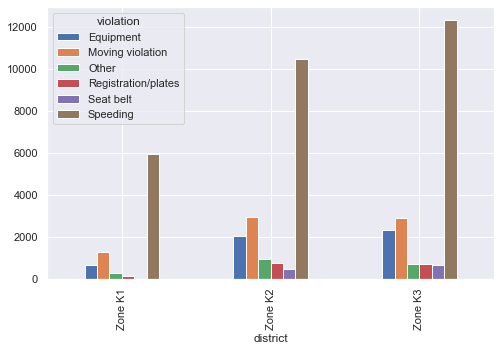

In [63]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar', figsize=(8,5))
plt.show()

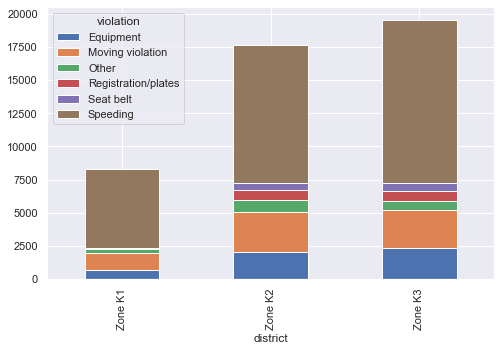

In [64]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True, figsize=(8,5))
plt.show()

**Answer:** `Speeding` is the dominant violation in all three zones. Zone K3 has the most violations.

### How long might you be stopped for a violation?

In [65]:
# Print the unique values in 'stop_duration'
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [66]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

In [67]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [68]:
# Print the unique values in 'stop_minutes'
ri.stop_minutes.unique()

array([ 8, 23, 45], dtype=int64)

In [69]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

In [70]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

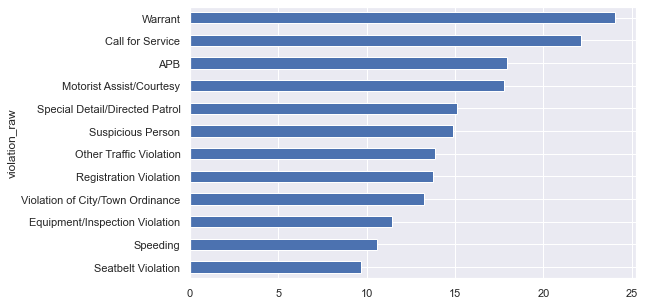

In [71]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh', figsize=(8,5))
plt.show()

**Answer:** Stop durations range by violation from under 10 min. to over 20 min.

# Exploring the weather dataset

In [72]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('data\weather.csv')

In [73]:
# Take a look at the head of the DataFrame
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [74]:
# Describe the temperature columns
weather[['TMIN', 'TAVG','TMAX']].describe()

,TMIN,TAVG,TMAX
count,4017.000000,1217.000000,4017.000000
mean,43.484441,52.493016,61.268608
std,17.020298,17.830714,18.199517
min,-5.000000,6.000000,15.000000
25%,30.000000,39.000000,47.000000
50%,44.000000,54.000000,62.000000
75%,58.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


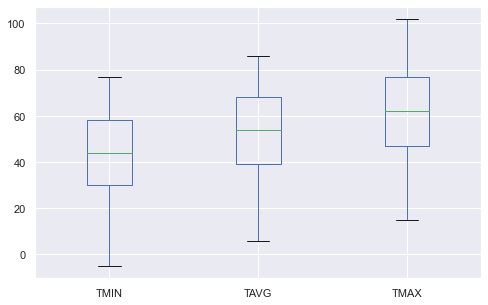

In [75]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box', figsize=(8,5))
plt.show()

In [76]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

In [77]:
# Describe the 'TDIFF' column
weather.TDIFF.describe()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

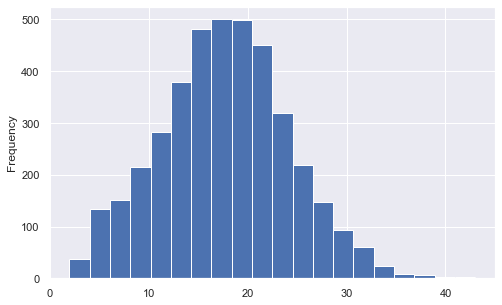

In [78]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20, figsize=(8,5))
plt.show()

## Categorizing the weather

In [79]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

In [80]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

In [81]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

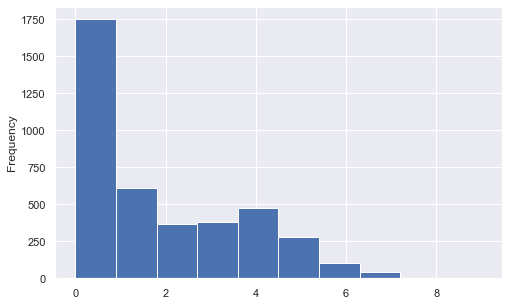

In [82]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist', figsize=(8,5))
plt.show()

In [83]:
# Count the unique values in 'bad_conditions' and sort the index
weather.bad_conditions.value_counts().sort_index()

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [84]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [85]:
# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [86]:
# Count the unique values in 'rating'
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

In [87]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

In [88]:
# Change dtype to ordered category
# Used method from pandas documentation rather than what was taught (depricated)
cat_dtype = pd.CategoricalDtype(categories=cats, ordered=True)

In [89]:
# Change the data type of 'rating' to CategoricalDtype
weather['rating'] = weather.rating.astype(cat_dtype)

In [90]:
# Check dtype
weather.rating.dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

# Merging datasets

In [91]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

In [92]:
# Examine the head of 'ri'
ri.head()

,stop_datetime,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [93]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

In [94]:
# Examine the head of 'weather_rating'
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [95]:
# Examine the shape of 'ri'
ri.shape

(86536, 17)

In [96]:
# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [97]:
# Examine the shape of 'ri_weather'
ri_weather.shape

(86536, 19)

In [98]:
# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

### Does weather affect the arrest rate?

In [99]:
# Calculate the overall arrest rate
ri_weather.is_arrested.mean()

0.0355690117407784

In [100]:
# Calculate the arrest rate for each 'rating'
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [101]:
# Calculate the arrest rate for each 'violation' and 'rating'
ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

In [102]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

In [103]:
# Print the 'arrest_rate' Series
arrest_rate

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

In [104]:
# Print the arrest rate for moving violations in bad weather
arrest_rate.loc['Moving violation', 'bad']

0.05804964058049641

In [105]:
# Print the arrest rates for speeding violations in all three weather conditions
arrest_rate.loc['Speeding', :]

violation  rating
Speeding   good      0.013405
           bad       0.013314
           worse     0.016886
Name: is_arrested, dtype: float64

In [106]:
# Unstack the 'arrest_rate' Series into a DataFrame
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [107]:
# Create the same DataFrame using a pivot table
ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


**Answer:** Arrest rate increases slightly as the weather worsens. That trend occurs across most violations.

# End of Exercise